<img alt="Pascual logo" height="120px" src="https://github.com/andresperez86/Data_Analysis_20252/blob/master/cropped-Institucion_Pascual_Bravo_Logo.png?raw=true" align="center" hspace="10px" vspace="10px" style="width:520px;height:152px;">
<h1><font color='01b3c2'> <center> Hierarchical Grouping (Clustering)  </font> </center>

<font  face="Courier New" size="3">
 <p><center>Prof. Andres Fernando Pérez  MSc.</center></p>
</font>

## **Estructura del ejercicio con Iris Dataset**

## **Cargamos librerias**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [3]:
from IPython.display import IFrame

IFrame('https://matplotlib.org/stable/users/explain/quick_start.html', width=800, height=400)

## cargar y visualizar el Dataset

In [ ]:
iris = sns.load_dataset('iris')
#Siempre es buena idea ver algunas filas de nuestro DataFrame.
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


# **Cargamos el Dataset iris es un conjunto de datos que tiene atributos de un tipo de flor que tienen 3 especies**

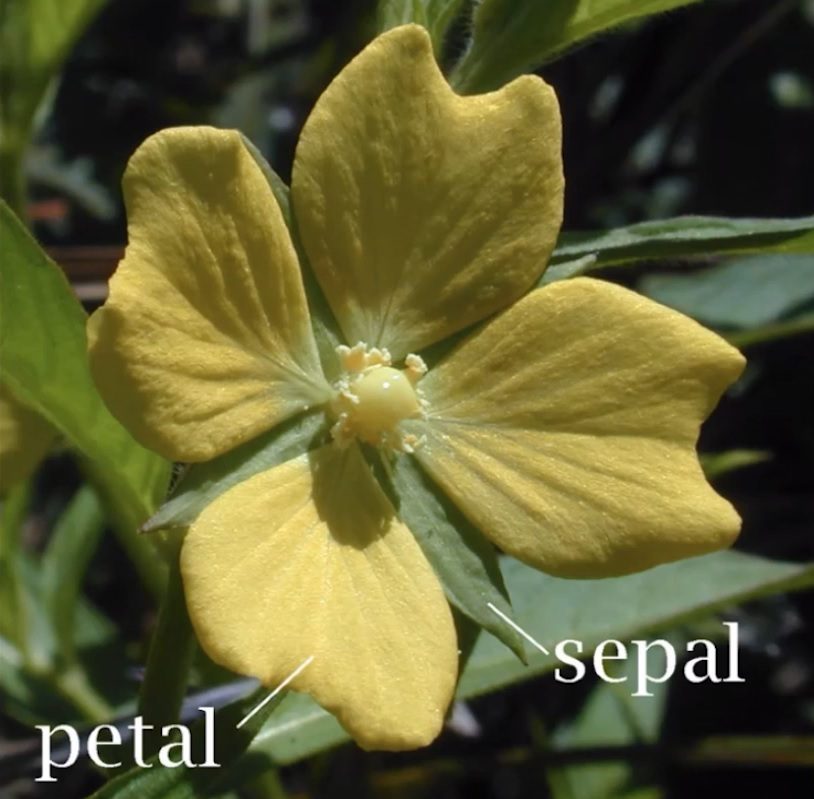



###Al cargar el dataset Iris de la librería sns (Seaborn), obtenemos un conjunto de datos que contiene mediciones de largo y ancho de sépalos y pétalos de tres especies de flores Iris. Estas mediciones nos permiten hacer análisis descriptivos, pero es importante recordar que estos datos representan solo una muestra.

In [ ]:
iris = sns.load_dataset('iris')
#Siempre es buena idea ver algunas filas de nuestro DataFrame.
print(type(iris))
iris.head(10)

<class 'pandas.core.frame.DataFrame'>


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.shape

(150, 5)

In [ ]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
iris.dtypes

,0
sepal_length,float64
sepal_width,float64
petal_length,float64
petal_width,float64
species,object


In [ ]:
# Puede utilizar el método sample para visualizar registros de forma aleatoria:
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
11,4.8,3.4,1.6,0.2,setosa
119,6.0,2.2,5.0,1.5,virginica
16,5.4,3.9,1.3,0.4,setosa
30,4.8,3.1,1.6,0.2,setosa
35,5.0,3.2,1.2,0.2,setosa


In [ ]:
#Ahora vamos a hacer el resumen estadístico de nuestro dataset total.
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Podemos ver cada columna independientemente:

iris.sepal_width.describe()

,sepal_width
count,150.000000
mean,3.057333
std,0.435866
min,2.000000
25%,2.800000
50%,3.000000
75%,3.300000
max,4.400000


In [ ]:
# Para obtener el resumen estadístico de un tipo de dato particular podemos utilizar el kwarg include:
iris.describe(include = 'object')

,species
count,150
unique,3
top,setosa
freq,50


In [ ]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
iris.groupby('species').describe()

sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... petal_length      petal_width         \
                 count   mean  ...          75%  max       count   mean   
species                        ...                                        
setosa            50.0  3.428  ...        1.575  1.9        50.0  0.246   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
species                                        
setosa      0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [ ]:
iris.species.value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


In [ ]:
# Conteo de los niveles en las columnas categóricas
cols_cat = ['species']

for col in cols_cat:
  print(f'Columna {col}: {iris[col].nunique()} niveles')

Columna species: 3 niveles


<Axes: xlabel='species'>

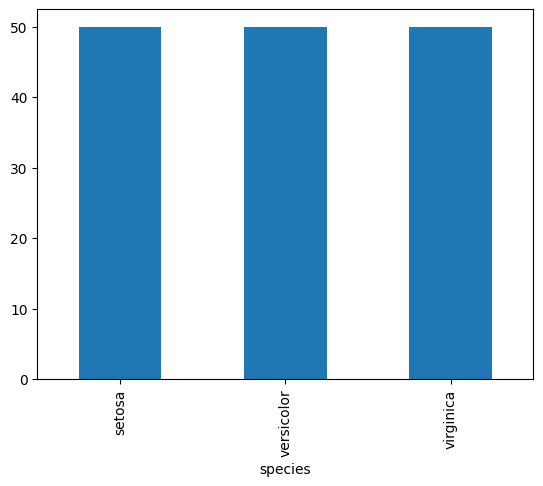

In [ ]:
iris['species'].value_counts().plot(kind = 'bar')

##Este pequeño resumen nos da una idea de los datos que tenemos. **Pero únicamente es para esta muestra**.


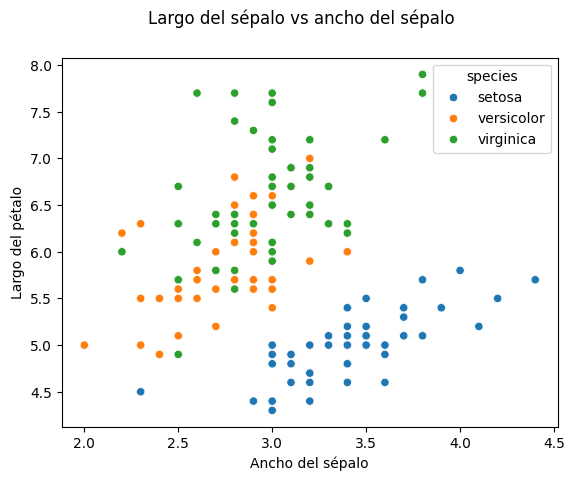

In [ ]:
# Diagramas de dispersion scatterplot
# Mas informacion de este tipo de diagramas https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(data=iris, x = 'sepal_width', y = 'sepal_length', hue = 'species')
plt.xlabel('Ancho del sépalo')
plt.ylabel('Largo del pétalo')
plt.suptitle('Largo del sépalo vs ancho del sépalo')
plt.show()

<Axes: xlabel='petal_length', ylabel='petal_width'>

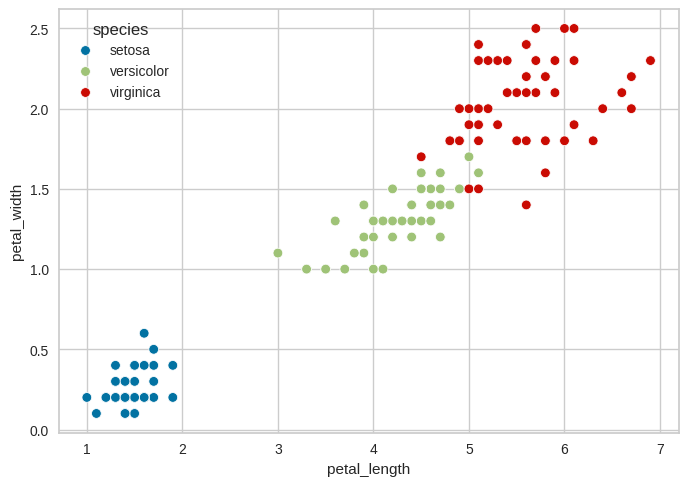

In [ ]:
# Grafique los datos segmentandolos por especie
sns.scatterplot(data=iris, x = 'petal_length', y = 'petal_width', hue = 'species')

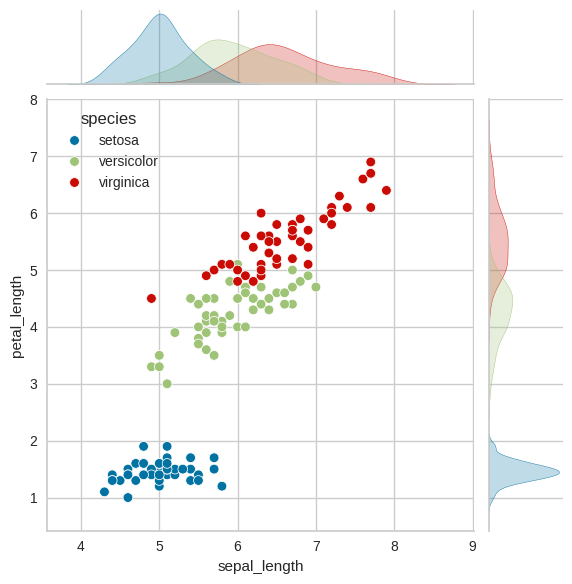

In [ ]:
# joint plot //http://seaborn.pydata.org/generated/seaborn.jointplot.html
sns.jointplot(data=iris, x = 'sepal_length', y = 'petal_length', hue = 'species')

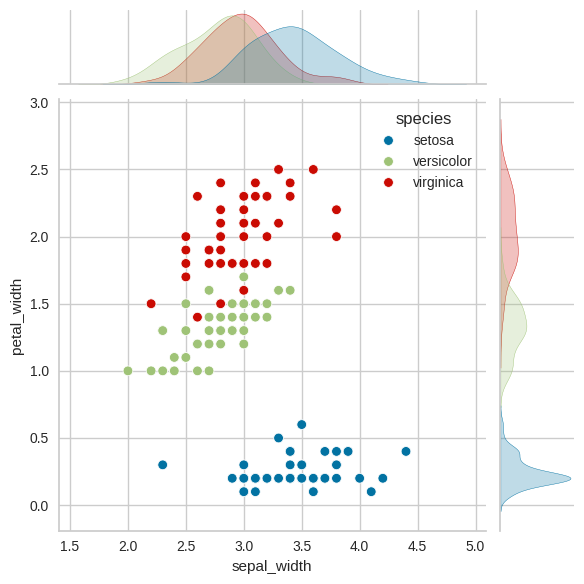

In [ ]:
# joint plot //http://seaborn.pydata.org/generated/seaborn.jointplot.html
sns.jointplot(data=iris, x = 'sepal_width', y = 'petal_width', hue = 'species')

¿Cómo seleccionar las mejores variables para aplicar clustering?
1. Visualización Exploratoria (EDA)
Usa gráficos de dispersión para comparar pares de variables y ver si hay separación natural de grupos.
✅ Lo que buscamos: formaciones de clústeres visuales, sin mucho solapamiento.

Ejemplo en el dataset Iris:

petal length y petal width muestran grupos bien definidos.

sepal length y sepal width están más dispersos y mezclados.

👉 Esto sugiere que las variables de pétalos son mejores para clustering.

2. Correlación entre variables

Variables altamente correlacionadas pueden ser redundantes.

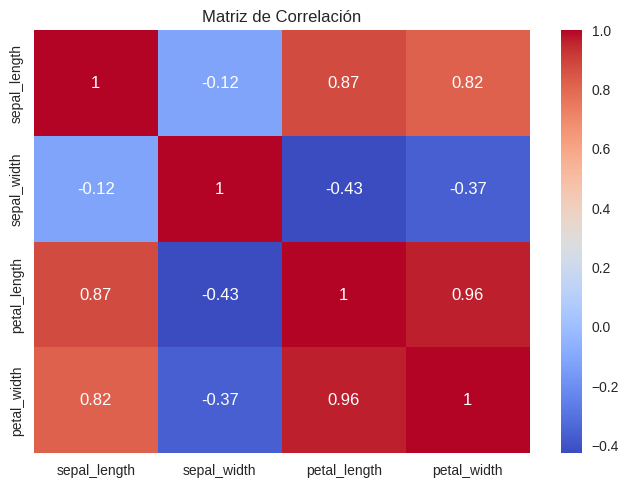

In [ ]:
sns.heatmap(iris.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

👉 Si dos variables tienen correlación alta (por ejemplo, petal length y petal width), puedes usar solo una o aplicar reducción de dimensión.

3. Reducción de Dimensión (PCA)

Cuando hay muchas variables, usamos PCA para encontrar las combinaciones lineales que mejor explican la varianza de los datos.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
iris_scaled = ss.fit_transform(iris.iloc[:, :4])
iris_scaled = pd.DataFrame(iris_scaled, columns=iris.columns[:4])
iris_scaled.head()


,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


<Axes: xlabel='PC1', ylabel='PC2'>

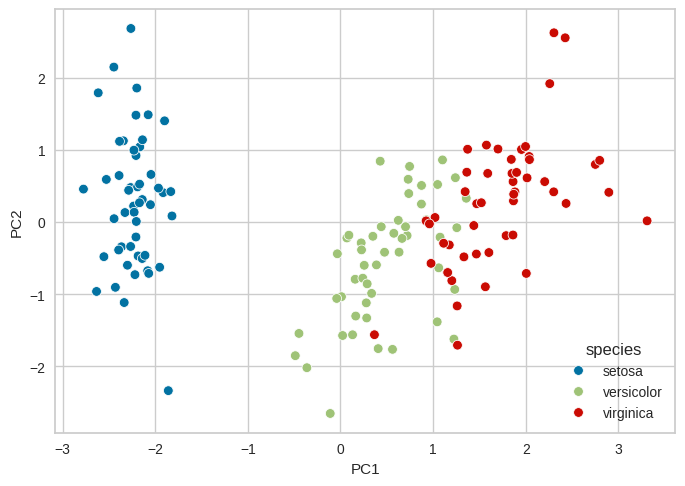

In [ ]:
pca = PCA(n_components=2)
# The 'iris_scaled' variable is a NumPy array, so we should use array indexing instead of '.iloc'
iris_pca = pca.fit_transform(iris_scaled.iloc[:, :4])
iris_pca = pd.DataFrame(iris_pca, columns=['PC1', 'PC2'])
iris_pca['species'] = iris['species']
sns.scatterplot(data=iris_pca, x='PC1', y='PC2', hue='species')

In [ ]:
data = iris_pca
data.head(5)

,PC1,PC2,species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


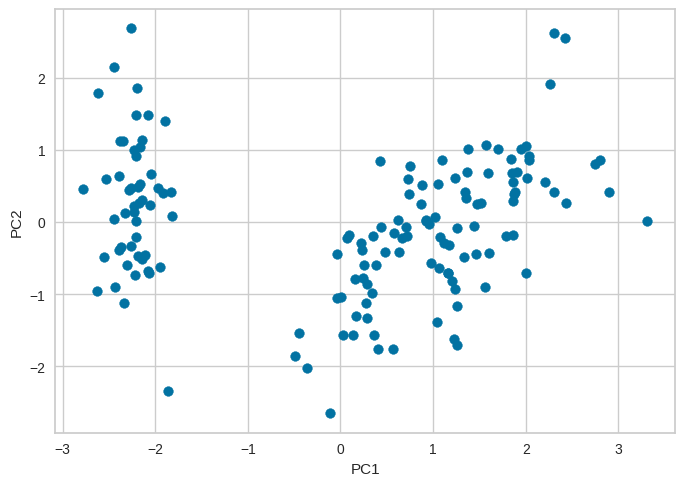

In [ ]:
X = iris_pca[["PC1","PC2"]]
X.head(5)

plt.scatter(X.PC1, X.PC2, cmap = 'Paired')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Después puedes aplicar clustering sobre los dos primeros componentes principales.

4. Evaluación de Resultados del Clustering
Si haces clustering con diferentes pares de variables, puedes comparar resultados usando métricas como:

Silhouette Score

Davies-Bouldin Index

Inertia (para k-means)

Ejemplo con Silhouette:


Elbow and Silhouette method

Ejemplo con Silhouette:

Silhouette Score: 0.66


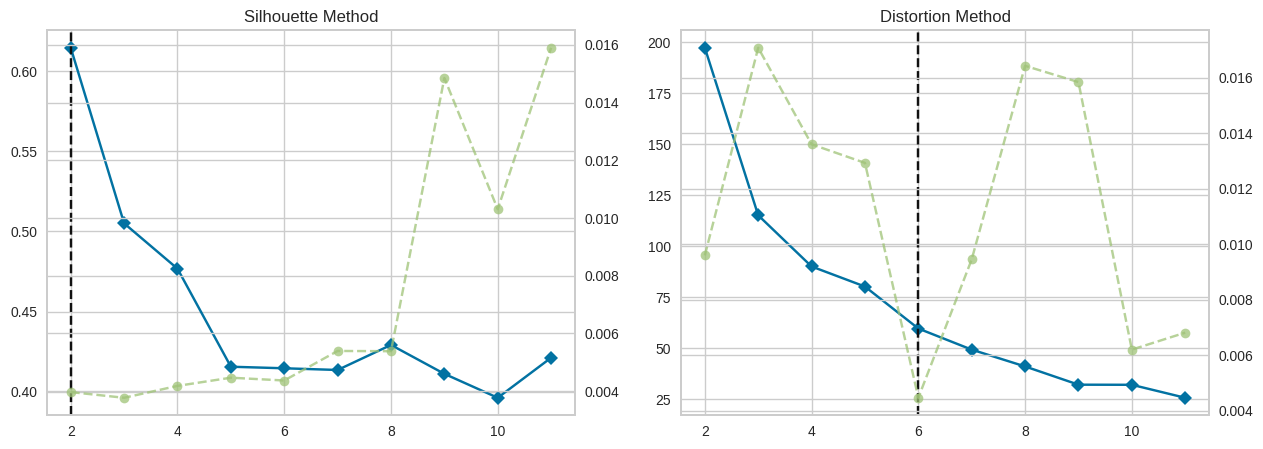

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings('ignore')

_,axes = plt.subplots(1,2,figsize=(15,5))

model = KMeans()
# Change k range to start from 2 instead of 1
visualizer = KElbowVisualizer(model, k=(2,12),metric= 'silhouette', ax=axes[0]) # start with k=2
visualizer.fit(X)
axes[0].set_title('Silhouette Method')

visualizer = KElbowVisualizer(model, k=(2,12),metric= 'distortion', ax=axes[1]) # start with k=2
visualizer.fit(X)
axes[1].set_title('Distortion Method')


X = iris[['petal_length', 'petal_width']]
kmeans = KMeans(n_clusters=3, n_init=10)
labels = kmeans.fit_predict(X)

score = silhouette_score(X, labels)
print(f"Silhouette Score: {score:.2f}")

Esta imagen tiene dos paneles que se utilizan comúnmente para determinar el número óptimo de clústeres en algoritmos de agrupamiento, como K-Means o agrupamiento jerárquico. Estos métodos te ayudan a decidir cuántos grupos tiene tu conjunto de datos.

🔹 Panel izquierdo: Silhouette Method
Qué mide:
Silhouette Score evalúa la calidad del agrupamiento.

El valor oscila entre -1 y 1:

🔵 Cercano a 1: Clústeres bien definidos y separados.

⚪ Cercano a 0: Clústeres superpuestos.

🔴 Negativo: Asignaciones incorrectas.

Interpretación:
Se prueba con distintos valores de k (número de clústeres).

La línea negra punteada marca el mejor k según el score más alto.

En este caso, el mejor número de clústeres sería 2 porque da el puntaje más alto (~0.62).

 Panel derecho: Distortion Method (Elbow Method)
Qué mide:
Distortion (inercia): suma de las distancias cuadradas de cada punto a su centroide.

A menor valor ➝ mejor agrupamiento interno (más compacto).

Interpretación:
Se busca el “codo” en la curva, donde la mejora se estabiliza.

En este gráfico, la línea negra punteada está en k = 6 → posible número óptimo según el codo.

🤔 ¿Por qué hay dos valores distintos?
Porque cada método evalúa el clustering desde una perspectiva diferente:

Silhouette mide la separación y cohesión.

Elbow mide la compactación.

⚖️ Lo ideal es comparar ambos y también revisar visualmente los clústeres.

👉 Repite el análisis con diferentes pares de variables y elige el par con mejor separación.

In [ ]:
X = iris_pca[['PC1', 'PC2']]
kmeans = KMeans(n_clusters=2, n_init=10).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)


[[ 1.11237658 -0.14446373]
 [-2.22475316  0.28892745]]


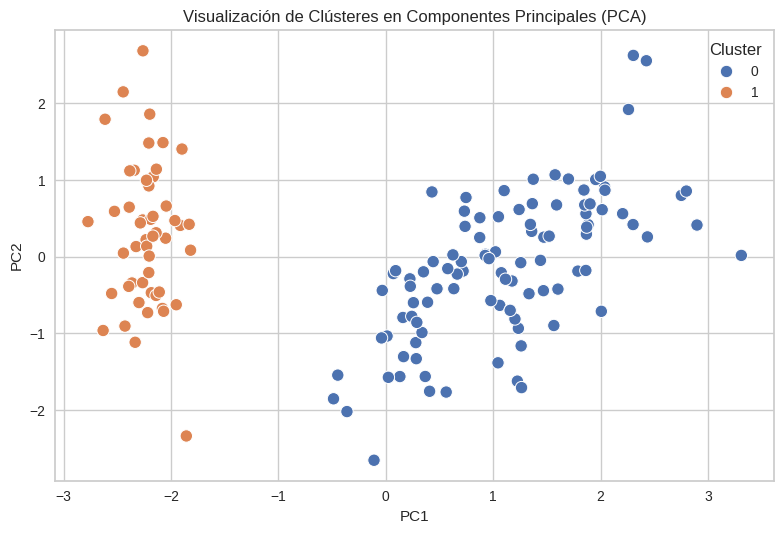

In [ ]:
predictions = kmeans.fit_predict(X)
#print(predictions)
# plot predictions

sns.scatterplot(data=X, x='PC1', y='PC2', hue=predictions, palette='deep', s=80)
plt.title("Visualización de Clústeres en Componentes Principales (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import linkage, dendrogram

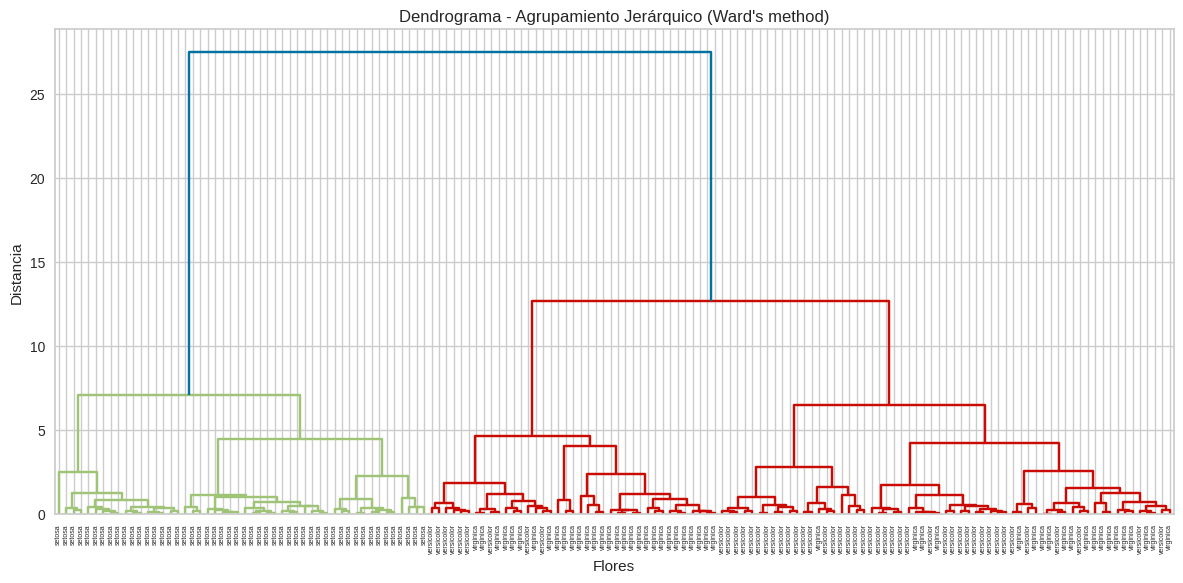

In [ ]:
# Seleccionar las características más representativas
X = iris_pca[['PC1', 'PC2']]

# Calcular el linkage para el dendrograma
Z = linkage(X, method='ward')

# Graficar dendrograma
plt.figure(figsize=(12, 6))
dendrogram(Z, labels=iris_df['species'].values, leaf_rotation=90)
plt.title("Dendrograma - Agrupamiento Jerárquico (Ward's method)")
plt.xlabel("Flores")
plt.ylabel("Distancia")
plt.tight_layout()
plt.show()

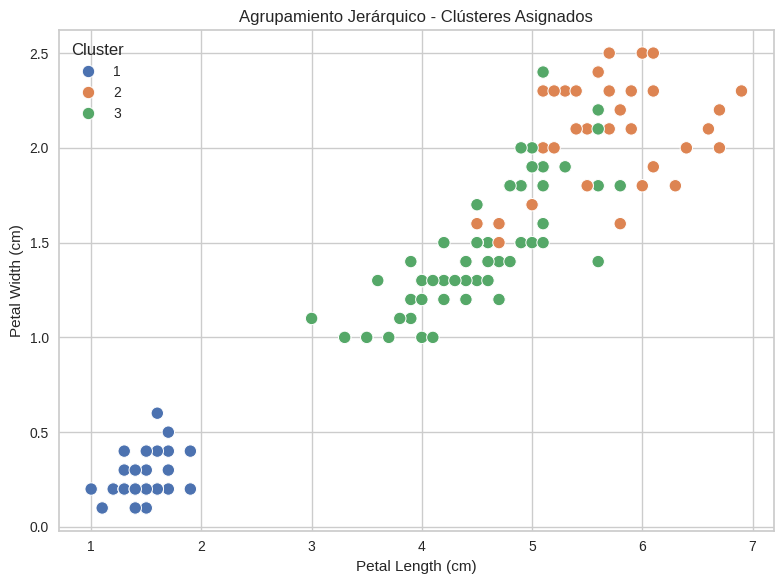

In [ ]:
from scipy.cluster.hierarchy import fcluster
import seaborn as sns

# Asignar clústeres desde el dendrograma (corte a 3 grupos)
clusters = fcluster(Z, t=3, criterion='maxclust')
iris_df['cluster'] = clusters

# Visualizar los resultados con scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=iris_df,
    x='petal length (cm)',
    y='petal width (cm)',
    hue='cluster',
    palette='deep',
    s=80
)
plt.title("Agrupamiento Jerárquico - Clústeres Asignados")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

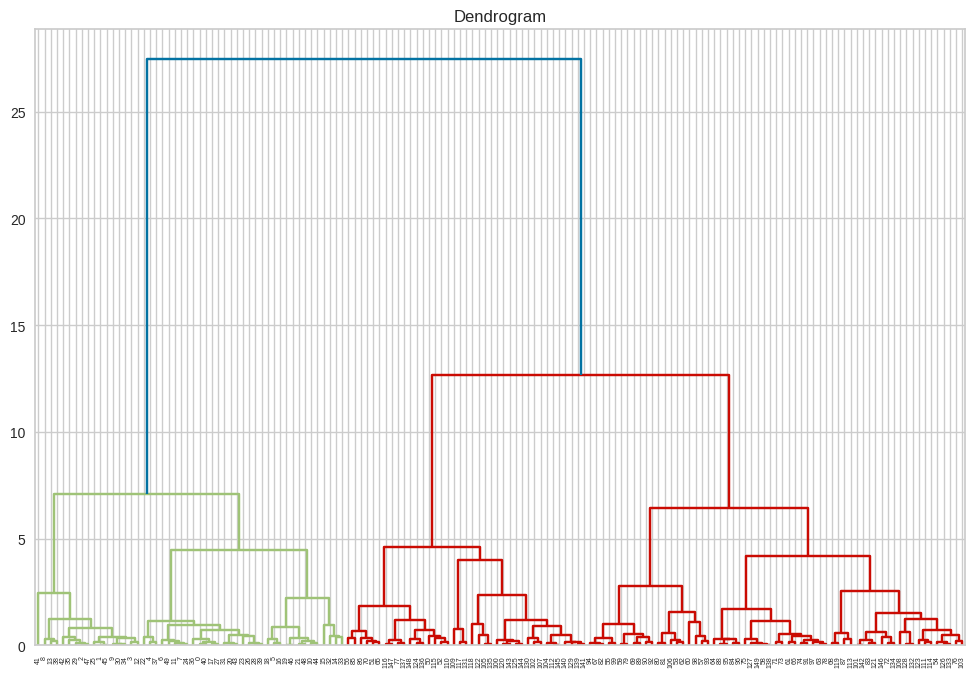

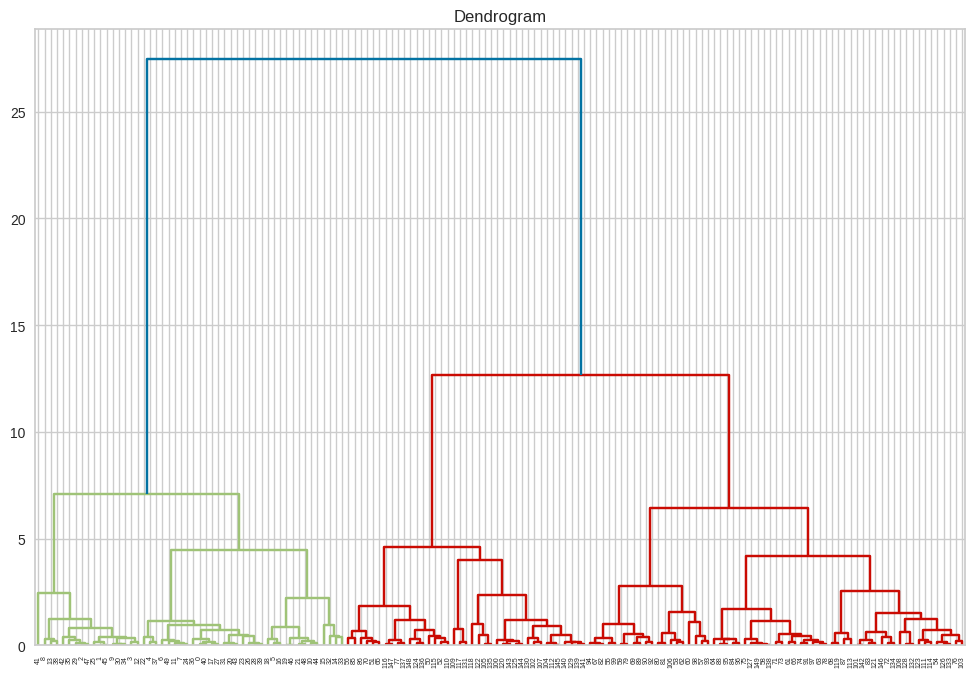

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings('ignore')




plt.figure(figsize =(12, 8))
plt.title('Dendrogram')

Dendrogram = dendrogram((linkage(X, method='ward')))
plt.show()
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings('ignore')




plt.figure(figsize =(12, 8))
plt.title('Dendrogram')

Dendrogram = dendrogram(linkage(X, method='ward'))
plt.show()


model = AgglomerativeClustering(distance_threshold=0, n_clusters=None) #added a value for distance_threshold
predictions = model.fit_predict(X) # changed _ to model.fit_predict(X)


# Plot predictions

# Plot predictions

<p align="left"><b><font face='Courier New' color="white" align="left" size=4>Copyright.</font></b>
<img alt="GIIAM" height="120px" src="https://pascualbravo.edu.co/investigacion/giiam/" align="right" hspace="10px" vspace="0px" height="120" width="350"">
                                                                                                                              
<font face='Verdana' size="2.5">
Andres Fernando Perez G. <a href="https://scienti.minciencias.gov.co/cvlac/visualizador/generarCurriculoCv.do?cod_rh=0000347507">  CvLAC</a><br>
I.U Pascual Bravo.<br>
Calle 73 # 73A – 226<br>
Medellín, Colombia. South America.
    
</p>
</font>
    
</p>
</font>

<center><b><font color='01b3c2' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="4">I.U Pascual Bravo.</font></b> </center>